In [2]:
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv(r'C:\Users\USER-PC\Documents\CodSoft\MovieInfo.csv',encoding='cp1252')

In [21]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [23]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [24]:
#Data Filtering and Preprocessing

In [25]:
attribute=df.columns
print(attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [26]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [27]:
shape=df.shape
print(f"Number of rows: {shape[0]}, Number of columns: {shape[1]}")

Number of rows: 15509, Number of columns: 10


In [28]:
unique_genres = df['Genre'].unique()

In [29]:
print("Unique Genres:",unique_genres)

Unique Genres: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family,

In [31]:
rating_dist=df['Rating'].value_counts()
print("Rating Distribution:\n",rating_dist)

Rating Distribution:
 Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64


In [33]:
attributes=['Name','Year','Duration','Votes','Rating']
df.dropna(subset=attributes,inplace=True)
missing_val=df.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [34]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [35]:
movie_name_rating=df[['Name','Rating']]
print(movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


In [39]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

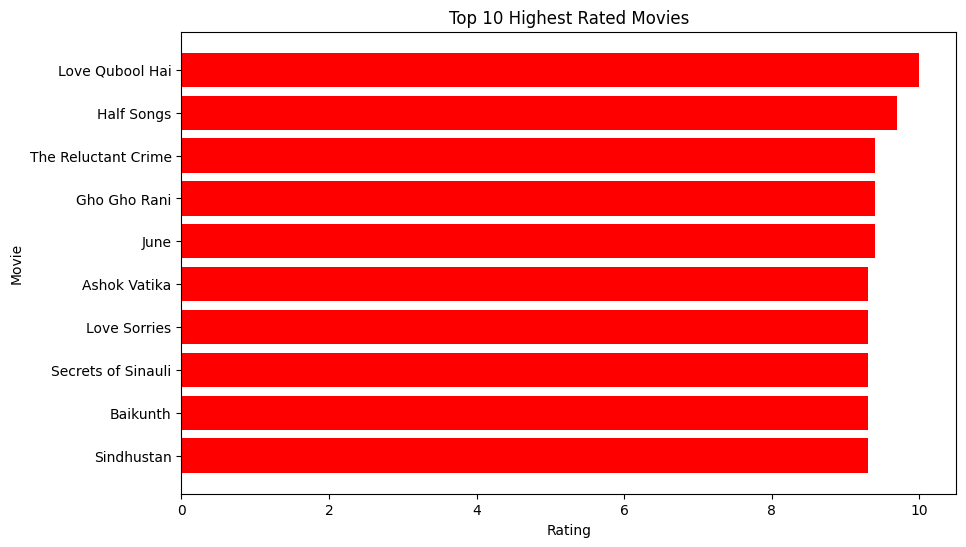

In [41]:
top_rated_movies=df.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'],color='Red')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest Rated Movies')
plt.gca().invert_yaxis()
plt.show()

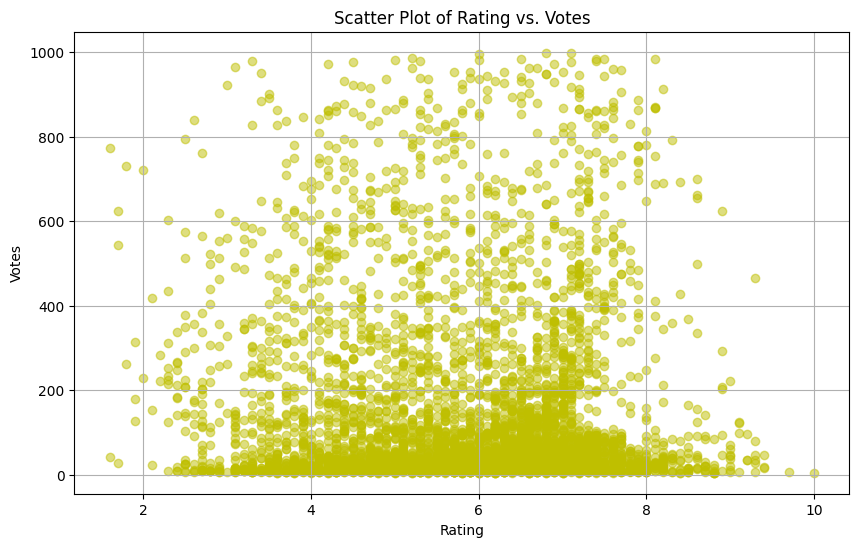

In [44]:
df['Votes'] = pd.to_numeric(df['Votes'],errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(df['Rating'],df['Votes'],alpha=0.5,color='y')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs. Votes')
plt.grid(True)
plt.show()

In [47]:
import seaborn as sns

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_10552\1667998265.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Movies',y='Actor',data=actor_counts.head(10),palette='viridis')


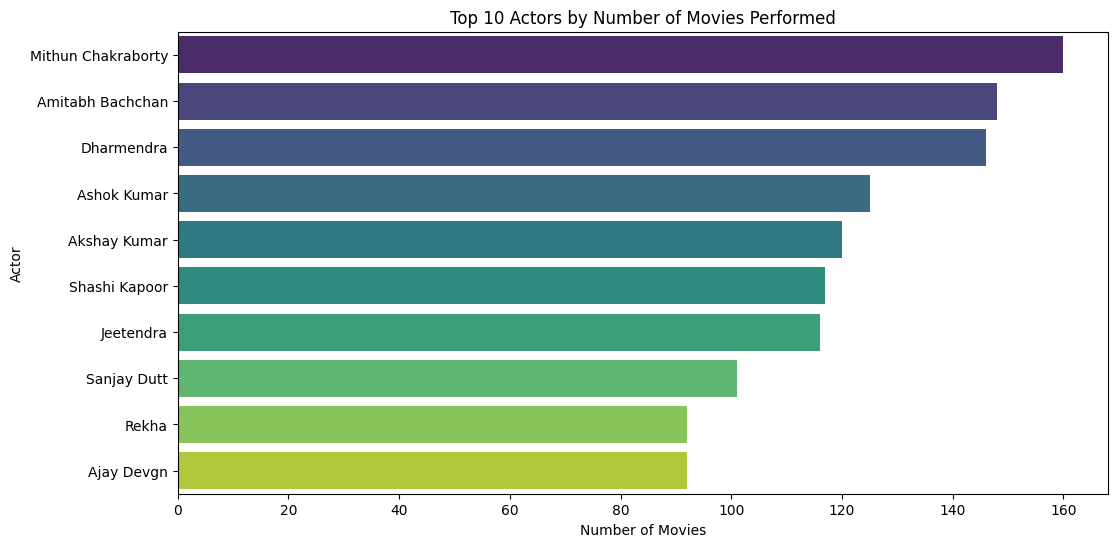

In [49]:
actors=pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']])
actor_counts=actors.value_counts().reset_index()
actor_counts.columns=['Actor','Number of Movies']
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Movies',y='Actor',data=actor_counts.head(10),palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

C:\Users\USER-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\USER-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\USER-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\USER-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


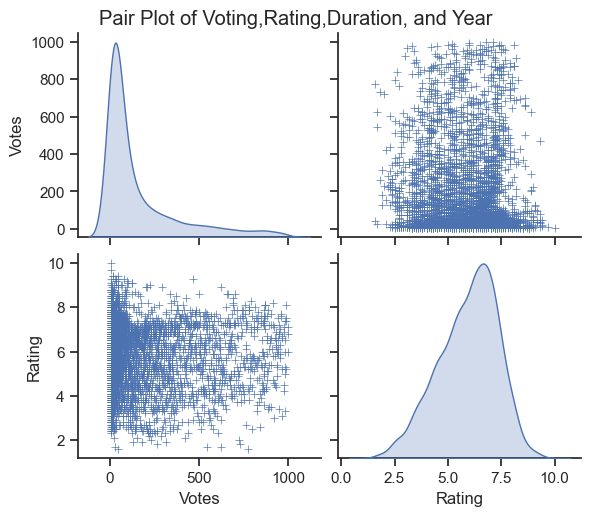

In [50]:
columns_of_interest=['Votes','Rating','Duration','Year']
sns.set(style='ticks')
sns.pairplot(df[columns_of_interest],diag_kind='kde',markers='+',palette='viridis',height=2.5,aspect=1.2)
plt.suptitle('Pair Plot of Voting,Rating,Duration, and Year',y=1.02)
plt.show()

In [51]:
#Feature Engineering

In [53]:
df_sorted=df.sort_values(by='Votes',ascending=False)
df_sorted['Vote_Count_Percentile']=df_sorted['Votes'].rank(pct=True)*100
df_sorted.reset_index(drop=True,inplace=True)
print(df_sorted[['Name','Votes','Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [54]:
df=df.dropna(subset=['Votes'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [56]:
from sklearn.model_selection import train_test_split

In [67]:
X=df[['Year','Duration','Votes']]
y=df['Rating']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model=LinearRegression()

In [63]:
model.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred=model.predict(X_test)

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [66]:
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error: 1.0829799341140924
Root Mean Squared Error: 1.346788944617894
R-squared (R2) Score: 0.1003056675082592
